In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.optimize import linear_sum_assignment

In [2]:
def source_terminus(A):
    rows=A.nonzero()[0]
    cols=A.nonzero()[1]
    mA=rows.shape[0]
    nA=A.shape[0]
    data=np.full([mA],1)
    As=csr_matrix((data, (rows, np.arange(mA))), shape=(nA,mA))
    At=csr_matrix((data, (cols, np.arange(mA))), shape=(nA,mA)) 
    return As,At

def similarity_scores(A,B,iterations=10):
    As,At=source_terminus(A)
    Bs,Bt=source_terminus(B)
    X=np.full([B.shape[0],A.shape[0]],1,dtype=np.float64)
    for i in range(iterations):
        Y=Bs.T @ X @ As + Bt.T @ X @ At
        Y /= np.linalg.norm(Y,'fro')
        X=Bs @ Y @ As.T + Bt @ Y @ At.T
        X /= np.linalg.norm(X,'fro')
    return X,Y

def draw_graph(G):
    nx.draw(
        G,
        pos=nx.circular_layout(G),
        with_labels=True,
        node_color='white',
        edgecolors='black',
        node_size=800, 
        font_size=16
    )

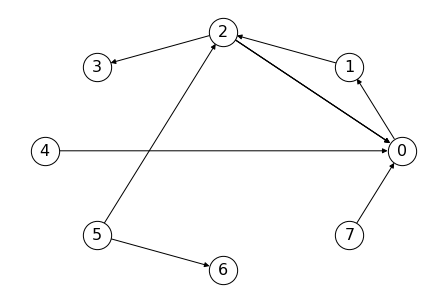

In [3]:
G=nx.scale_free_graph(8, seed=2)
draw_graph(G)

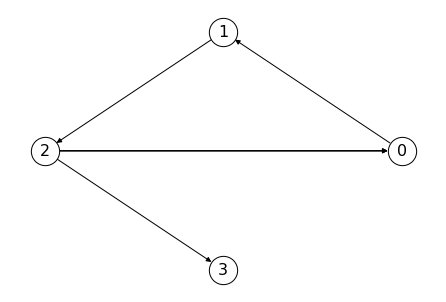

In [4]:
g=G.subgraph([0,1,2,3])
draw_graph(g)

In [5]:
A=nx.adjacency_matrix(g)
B=nx.adjacency_matrix(G)
X,Y=similarity_scores(A,B)
X, Y

(array([[7.45640196e-02, 1.46270903e-02, 1.37101509e-01, 6.54194504e-02],
        [1.52697234e-02, 6.36542947e-02, 9.82181822e-02, 8.11972100e-03],
        [1.05220518e-01, 1.06208593e-01, 9.51255932e-01, 7.57749200e-02],
        [5.55780178e-02, 6.16788838e-03, 6.56569930e-02, 5.55780178e-02],
        [8.63782732e-04, 8.11972100e-03, 1.84952998e-02, 0.00000000e+00],
        [6.65704986e-03, 5.96227063e-02, 9.52498151e-02, 0.00000000e+00],
        [5.57159767e-03, 3.93353373e-04, 9.61628621e-03, 5.57159767e-03],
        [8.63782732e-04, 8.11972100e-03, 1.84952998e-02, 0.00000000e+00]]),
 array([[0.03247077, 0.0266346 , 0.03625284, 0.05576799, 0.03455239],
        [0.02872543, 0.2384016 , 0.04795482, 0.24662016, 0.04097682],
        [0.02825761, 0.05767675, 0.24097768, 0.25605634, 0.23883011],
        [0.04986358, 0.24852893, 0.24824317, 0.44690851, 0.24126516],
        [0.02624663, 0.0405075 , 0.23650485, 0.23888709, 0.23650485],
        [0.00367571, 0.03455239, 0.0219244 , 0.03700306,

In [6]:
r,c=linear_sum_assignment(Y,maximize=True) #Hungarian algorithm
for i in range(r.shape[0]):
    print(f'Vrh {r[i]} odgovara vrhu {c[i]}')

Vrh 0 odgovara vrhu 0
Vrh 1 odgovara vrhu 1
Vrh 2 odgovara vrhu 2
Vrh 3 odgovara vrhu 3
Vrh 4 odgovara vrhu 4
